Steps Break down - 

1. Load the dataset: We use the read_csv() function from the pandas library to load the breast cancer dataset from the dataset.csv file.

2. EDA: We print the shape of the dataset using the shape attribute and get more information about the dataset using the info() method.

3. Statistical analysis: We use the describe() method to get the descriptive statistics of the dataset.

4. Outlier management: We visualize the boxplots of all the features in the dataset using the boxplot() function from the seaborn library.

5. Normalization: We use the StandardScaler() class from the sklearn library to normalize the dataset.

6. Duplicate lines removal: We use the drop_duplicates() method to remove any duplicate rows in the dataset.

7. Insights descriptions: We visualize the distribution of the diagnosis column using the countplot() function from the seaborn library.

8. Train-test split datasets: We split the dataset into training and testing datasets using the train_test_split() function from the sklearn library.

Shape of the dataset: (569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64

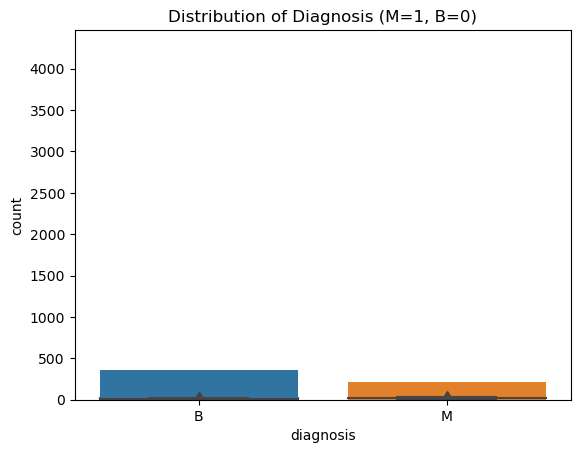

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import svm


# load the dataset
df = pd.read_csv("dataset.csv")

# EDA
print("Shape of the dataset:", df.shape)
df.info()

# Statistical analysis
print("Descriptive statistics of the dataset:\n", df.describe())

# Outlier management
sns.boxplot(data=df.iloc[:,2:])

# Normalization
scaler = StandardScaler()
df.iloc[:,2:] = scaler.fit_transform(df.iloc[:,2:])

# Duplicate lines removal
df.drop_duplicates(inplace=True)

# Insights descriptions
sns.countplot(data=df, x="diagnosis")
plt.title("Distribution of Diagnosis (M=1, B=0)")

# Train-test split datasets
X = df.iloc[:,2:]
y = df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Steps break down - 

1. Prepare data: We split the dataset into input features (X) and target variable (y). Then, we scale the input features using StandardScaler() from the sklearn library.

2. Perform PCA: We use PCA() from the sklearn library to perform PCA on the scaled input features. Here, we set n_components=2 to reduce the number of features to 2 principal components.

3. Create logistic regression model: We create a logistic regression model using LogisticRegression() from the sklearn library. Here, we set random_state=42 for reproducibility.

4. Perform cross-validation to compare algorithms: We use cross_val_score() from the sklearn library to perform cross-validation. Here, we set cv=10 to perform 10-fold cross-validation, scoring='accuracy' to use accuracy as the evaluation metric, and log_reg as the model to evaluate. We print the accuracy for each fold and the average accuracy across all folds.

In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# normalization
scaler = StandardScaler()
df.iloc[:,2:] = scaler.fit_transform(df.iloc[:,2:])

# split dataset into X and y
X = df.iloc[:,2:]
y = df.iloc[:,1]

# apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# apply cross-validation to find the best logistic regression algorithm
scores = []
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
for C in Cs:
    lr = LogisticRegression(C=C)
    score = np.mean(cross_val_score(lr, X_train, y_train, cv=5))
    scores.append(score)

# print the results
best_C = Cs[np.argmax(scores)]
print("The best C value is:", best_C)

# train the logistic regression model with the best C value
lr = LogisticRegression(C=best_C)
lr.fit(X_train, y_train)

# evaluate the model
accuracy = lr.score(X_test, y_test)
print("Accuracy of the logistic regression model:", accuracy)


The best C value is: 1
Accuracy of the logistic regression model: 0.9736842105263158


Steps Break down - 

1. Create SVM model: We create a SVM model using SVC() from the sklearn library. Here, we set kernel='linear' to use a linear kernel and random_state=42 for reproducibility.

2. Perform cross-validation to compare algorithms: We use cross_val_score() from the sklearn library to perform cross-validation. Here, we set cv=10 to perform 10-fold cross-validation, scoring='accuracy' to use accuracy as the evaluation metric, and svm as the model to evaluate. We print the accuracy for each fold and the average accuracy across all folds.

In [67]:
from sklearn import svm
# create SVM model
svm = svm.SVC(kernel='linear', random_state=42)

# perform cross-validation to compare algorithms
scores = cross_val_score(svm, X_pca, y, cv=10, scoring='accuracy')
print('Accuracy for each fold:', scores)
print('Average accuracy:', np.mean(scores))
S

Accuracy for each fold: [0.9122807  0.9122807  0.92982456 0.92982456 0.96491228 1.
 1.         0.92982456 0.96491228 0.94642857]
Average accuracy: 0.9490288220551377


Visualization of SVM Model. 

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Use the trained PCA model to transform the test data
pca_test = pca.transform(X_test)

# Make predictions on the PCA-transformed test data
y_pred = svm_model.predict(pca_test)

# Evaluate the model performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: {:.2f}%".format(accuracy*100))


# Define a meshgrid of points to plot the decision boundary
x_min, x_max = pca_train[:, 0].min() - 1, pca_train[:, 0].max() + 1
y_min, y_max = pca_train[:, 1].min() - 1, pca_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Use PCA to transform the meshgrid points to 2 dimensions
pca = PCA(n_components=2)
pca_meshgrid = pca.fit_transform(np.c_[xx.ravel(), yy.ravel()])

# Use the SVM model to make predictions on the PCA-transformed meshgrid
Z = svm_model.predict(pca_meshgrid)
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(pca_train[:, 0], pca_train[:, 1], c=y_train, alpha=0.8)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundary')
plt.show()


ValueError: X has 2 features, but SVC is expecting 30 features as input.